# 图像入门

In [2]:
import numpy as np
import cv2 as cv

## 读取图像

In [3]:
# 用灰度模式加载图像

img = cv.imread('messi.jpg', 0)

## 显示图像

In [7]:
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

## 保存图像

In [9]:
cv.imwrite('messigray.png',img)

True

## 总结

In [11]:
img = cv.imread('messi.jpg',0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27: # ESC 退出
    cv.destroyAllWindows()
elif k == ord('s'): # 's' 保存退出
    cv.imwrite('.png',img)
    cv.destroyAllWindows()

## Matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

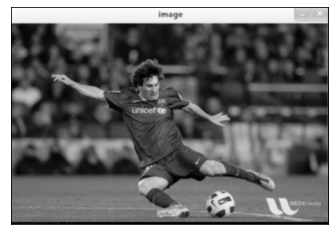

In [15]:
img = cv.imread('messi.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # 隐藏 X 和 Y 轴的刻度值
plt.show()

## OpenCV BGR VS matplotlib RGB

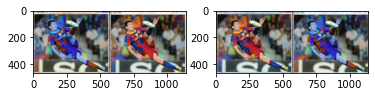

In [19]:
img = cv.imread('messi4.jpg')
# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1]
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

cv.imshow('bgr image',img) # expects true color
cv.imshow('rgb image',img2) # expects distorted color
cv.waitKey(0)
cv.destroyAllWindows()

# 视频入门

## 从相机中读取视频

In [21]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # 逐帧捕获
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # 我们在框架上的操作到这里
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # 显示结果帧e
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# 完成所有操作后，释放捕获器
cap.release()
cv.destroyAllWindows()

## 从文件播放视频

In [26]:
cap = cv.VideoCapture('test.avi')
while cap.isOpened():
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


## 保存视频

In [27]:
# 定义编解码器并创建VideoWriter对象
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # 写翻转的框架
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# 完成工作后释放所有内容
cap.release()
out.release()
cv.destroyAllWindows()

# 绘图功能

## 画线

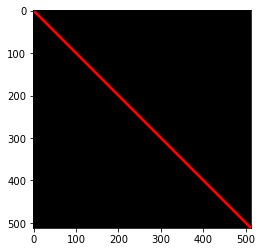

In [30]:
# 创建黑色的图像
img = np.zeros((512,512,3), np.uint8)
# 绘制一条厚度为5的蓝色对角线
cv.line(img,(0,0),(511,511),(255,0,0),5)
plt.imshow(img)

## 画矩形

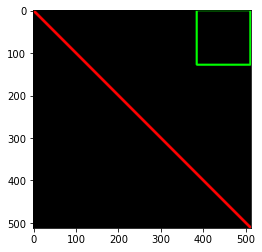

In [31]:
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
plt.imshow(img)

## 画圆圈

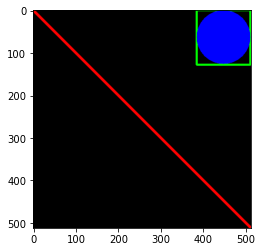

In [32]:
cv.circle(img,(447,63), 63, (0,0,255), -1)
plt.imshow(img)

## 画椭圆

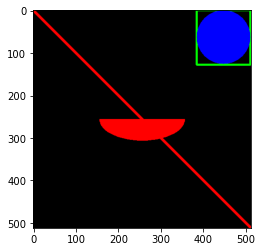

In [33]:
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
plt.imshow(img)

## 画多边形

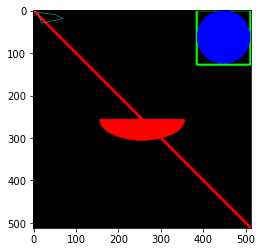

In [34]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
plt.imshow(img)

## 向图像添加文本

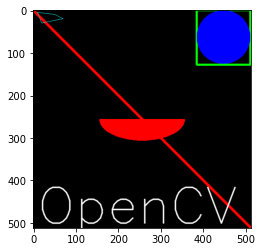

In [35]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
plt.imshow(img)

# 鼠标画笔

## 简单演示

In [36]:
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [37]:
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
# 创建一个黑色的图像，一个窗口，并绑定到窗口的功能
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

## 高级演示

In [38]:
drawing = False # 如果按下鼠标，则为真
mode = True # 如果为真，绘制矩形。按 m 键可以切换到曲线
ix,iy = -1,-1
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)